In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
x_train[0].shape

(28, 28)

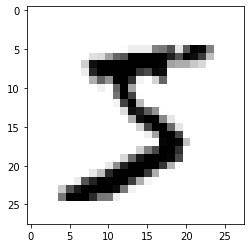

In [7]:
plt.imshow(single_image, cmap='binary')

In [8]:
y_train[0]

5

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [12]:
single_image.max()

255

In [13]:
single_image.min()

0

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
scaled_image = x_train[0]

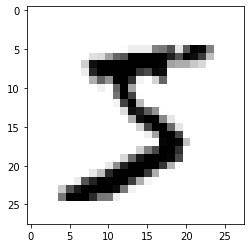

In [16]:
plt.imshow(scaled_image, cmap='binary')

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [24]:
model.fit(x_train, y_cat_train, epochs=10, 
          validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 330us/sample - loss: 0.1336 - accuracy: 0.9598 - val_loss: 0.0481 - val_accuracy: 0.9828
Epoch 2/10
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0470 - val_accuracy: 0.9850
Epoch 3/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0396 - val_accuracy: 0.9860
Epoch 4/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0324 - val_accuracy: 0.9896
Epoch 5/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.0364 - val_accuracy: 0.9880


In [25]:
metrics = pd.DataFrame(model.history.history)

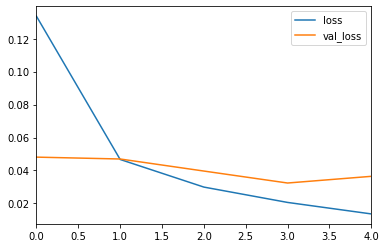

In [26]:
metrics[['loss', 'val_loss']].plot()

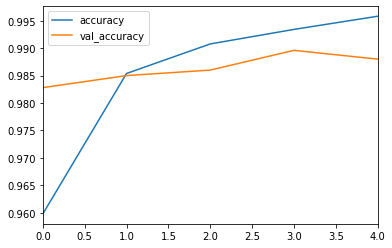

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.03644282846098504, 0.988]

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
predictions = model.predict_classes(x_test)

In [32]:
y_cat_test.shape

(10000, 10)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
confusion_matrix(y_test, predictions)

array([[ 972,    1,    1,    1,    0,    0,    3,    0,    0,    2],
       [   1, 1123,    1,    1,    1,    1,    3,    3,    1,    0],
       [   0,    1, 1023,    1,    0,    0,    1,    6,    0,    0],
       [   0,    0,    3, 1002,    0,    3,    0,    0,    2,    0],
       [   0,    0,    1,    0,  964,    0,    4,    0,    0,   13],
       [   1,    0,    0,    6,    0,  881,    2,    0,    0,    2],
       [   4,    1,    1,    0,    1,    3,  948,    0,    0,    0],
       [   0,    0,    5,    1,    0,    0,    0, 1018,    2,    2],
       [   2,    0,    4,    2,    0,    2,    0,    3,  957,    4],
       [   0,    0,    0,    1,    7,    2,    0,    6,    1,  992]])

In [36]:
import seaborn as sns

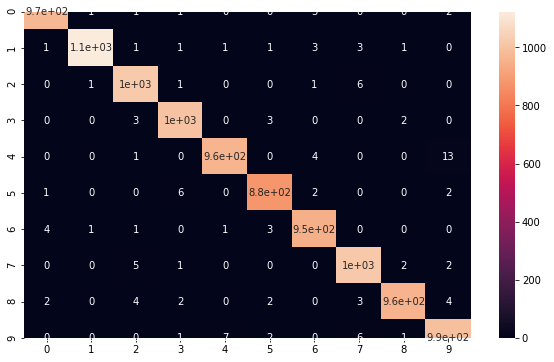

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

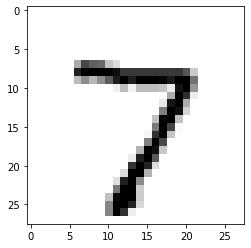

In [38]:
plt.imshow(x_test[0].reshape(28, 28), cmap='binary')

In [39]:
my_number = x_test[0]

In [40]:
model.predict_classes(my_number.reshape(1, 28, 28, 1))

array([7])